In [57]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





In [43]:
df=pd.read_csv('Dataset.csv',encoding='latin-1')

In [44]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
df.shape

(5572, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [47]:
#Remove unnecessary columns and rename them
df=df[['v1','v2']]
df.columns=['label','messages']
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [49]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [50]:
df = df[['label', 'messages']].copy()
def clean_text(text):
    text=text.lower()
    text=re.sub("[^a-zA-Z ]", "", text)
    return text

df.loc[:, 'clean_message'] = df['messages'].apply(clean_text)
df[['messages', 'clean_message']].head()


,messages,clean_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [ ]:
df.drop['message',a]

In [51]:
#tf idf vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
print(X.shape)


(5572, 8513)


In [52]:
#label encoding
le = LabelEncoder()
y = le.fit_transform(df['label'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          5572 non-null   object
 1   messages       5572 non-null   object
 2   clean_message  5572 non-null   object
dtypes: object(3)
memory usage: 130.7+ KB


In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)



In [54]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)



In [58]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9775784753363229

Confusion Matrix:
 [[962   3]
 [ 22 128]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



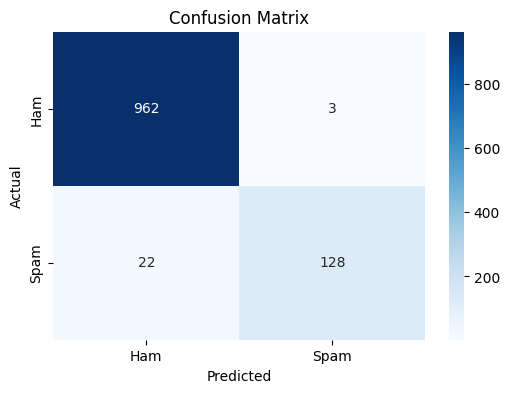

In [59]:
#visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#save model
import joblib
joblib.dump(svm, 'svm_spam_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [62]:
#Load model and vectorizer
loaded_model = joblib.load("svm_spam_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [ ]:
# Test on new messages
new_messages = ["Congratulations! You won a free lottery!", "Hey, are we meeting today?"]
cleaned = [re.sub("[^a-zA-Z ]", "", msg.lower()) for msg in new_messages]
X_new = loaded_vectorizer.transform(cleaned)
predictions = loaded_model.predict(X_new)


In [ ]:
#print result

for msg, pred in zip(new_messages, predictions):
    label = "Spam" if pred == 1 else "Ham"
    print(f"Message: {msg}\nPrediction: {label}\n")

Message: Congratulations! You won a free lottery!
Prediction: Spam

Message: Hey, are we meeting today?
Prediction: Ham

